IMPORTS Y DEFINICIONES GLOBALES

In [38]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from jcm_lib import fases

e=basis(2,0)
gr=basis(2,1)

e0=tensor(e,basis(2,0)) #1
e1=tensor(e,basis(2,1)) #2
g0=tensor(gr,basis(2,0)) #3
g1=tensor(gr,basis(2,1)) #4

sz=tensor(sigmaz(),qeye(2))
sx=tensor(sigmax(),qeye(2))
sy=tensor(sigmay(),qeye(2))
sp=tensor(sigmap(),qeye(2))
sm=tensor(sigmam(),qeye(2))
a=tensor(qeye(2),destroy(2))

w_0=1
g=0.001*w_0

ESFERA DE BLOCH

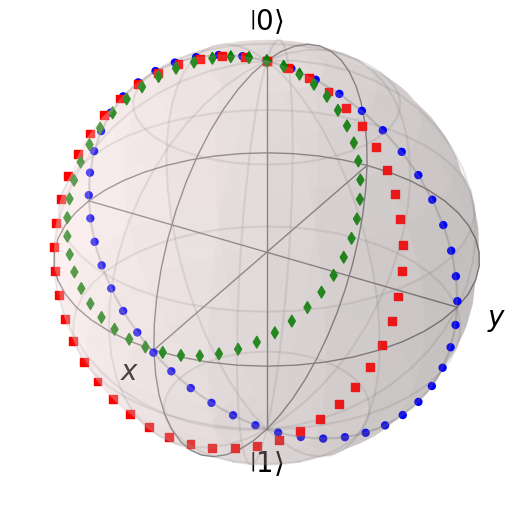

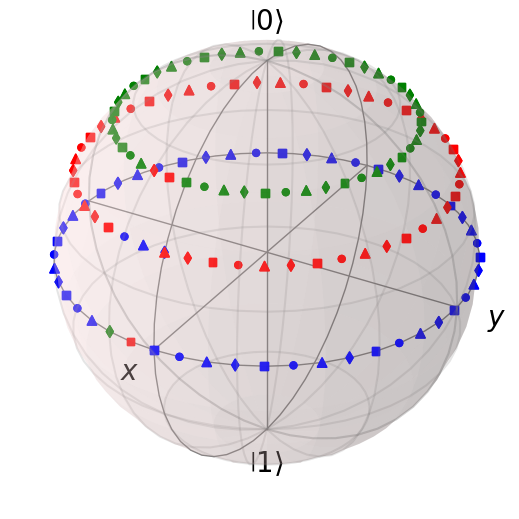

In [6]:
def omega_n(n_:int,delta:float):
    return np.sqrt(delta**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)+delta)/(2*omega_n(n_,delta)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)-delta)/(2*omega_n(n_,delta)))

'''---Esfera de bloch para enfoque cinematico---'''

esfera=Bloch()
esfera.make_sphere()
esfera.clear()

color=['blue','red','green','black']
for ind,delta in enumerate([0,g,2*g]):
    t=np.linspace(0,2*np.pi/omega_n(1,delta))
    c_b=-1j*np.sqrt(omega_n(1,delta)**2-delta**2)/omega_n(1,delta)*np.sin(omega_n(1,delta)*t/2)
    c_a=(omega_n(1,delta)-delta)/(2*omega_n(1,delta))*np.exp(1j*omega_n(1,delta)*t/2)+(omega_n(1,delta)+delta)/(2*omega_n(1,delta))*np.exp(-1j*omega_n(1,delta)*t/2)
    ux=np.real(c_b/c_a)
    uy=np.imag(c_b/c_a)
    px=(2*ux)/(1+ux**2+uy**2)
    py=(2*uy)/(1+ux**2+uy**2)
    pz=(1-ux**2-uy**2)/(1+ux**2+uy**2)
    points=[px,py,pz]

    esfera.add_points(points,colors=color[ind])


# esfera.view([-40,30])

esfera.render()
esfera.show()
# esfera.save('bloch cinematica.png')

'''---Fase de Berry---'''
esfera.clear()

for inde,delta in enumerate([0,g,2*g]):
    for omega in np.linspace(0,2*np.pi):
        psi_plus=cos_theta_n(1,delta)*e+np.exp(-1j*omega)*sin_theta_n(1,delta)*gr
        # psi_minus=-sin_theta_n(1,delta)*e0+np.exp(-1j*omega)*cos_theta_n(1,delta)*g1
        vec = [expect(sigmax(), psi_plus),
                expect(sigmay(), psi_plus),
                expect(sigmaz(), psi_plus)]

        esfera.add_points(vec,colors=color[inde])

esfera.render()
# esfera.save('bloch berry.png')
esfera.show()

DISIPATIVO Y REPRODUCCION DE GRAFICOS LUDMI

c:\Users\alima\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\alima\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, '(b) SC')

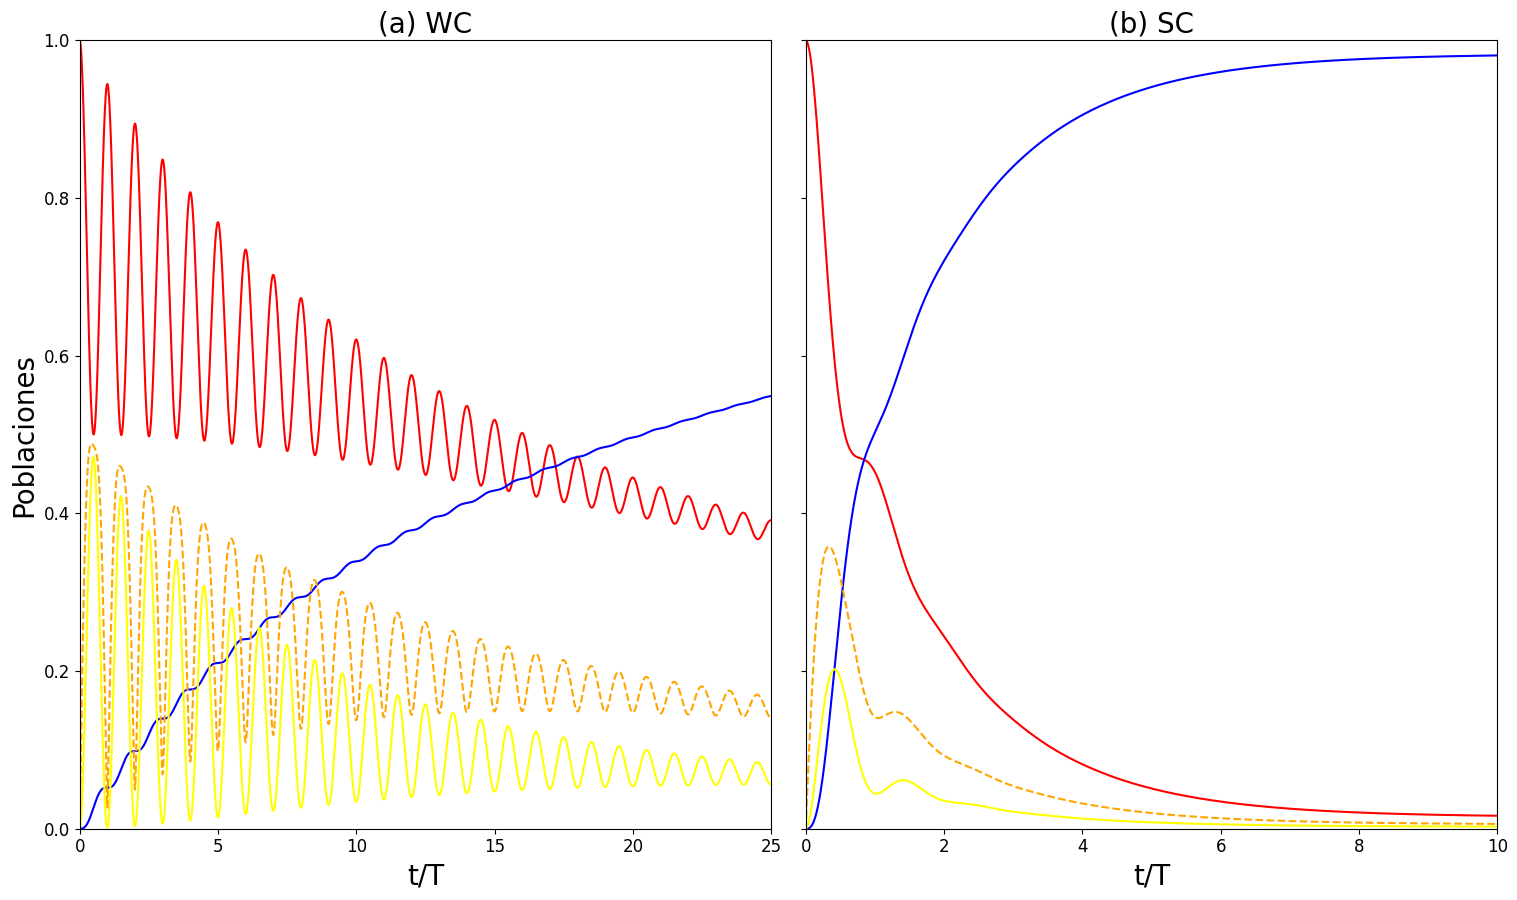

In [59]:
gamma=0.1*g
p=0.005*g
delta=2*g

fig=plt.figure(figsize=(16,9))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
fig.subplots_adjust(wspace=0.05)

ax=[ax1,ax2]
ax1.set_xlabel('t/T',size=20)
ax2.set_xlabel('t/T',size=20)
ax1.set_ylabel('Poblaciones',size=20)
ax2.set_yticklabels([])
# esfera1=Bloch()
# esfera1.make_sphere()
# esfera1.clear()

# esfera2=Bloch()
# esfera2.make_sphere()
# esfera2.clear()

# esferas=[esfera1,esfera2]
for j,gamma in enumerate([0.1*g,2*g]):
    H=delta/2*sz + g*(a.dag()*sm+a*sp)

    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta)
    t_final=25*T
    steps=100000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    # concu=concurrence(sol_d)
    # prob_g0=[expect(sol_d.states[i],g0*g0.dag()) for i in range(len(sol_d.states))]
    # prob_g1=[expect(sol_d.states[i],g1*g1.dag()) for i in range(len(sol_d.states))]
    # prob_e0=[expect(sol_d.states[i],e0*e0.dag()) for i in range(len(sol_d.states))]

    
    # expect_sz=[expect(sol_d.states[i],sz) for i in range(len(sol_d.states))]
    # expect_sx=[expect(sol_d.states[i],sx) for i in range(len(sol_d.states))]
    # expect_sy=[expect(sol_d.states[i],sy) for i in range(len(sol_d.states))]
    # vec=[[expect(sol_d.states[i],sz),expect(sol_d.states[i],sz),expect(sol_d.states[i],sz)] for i in range(len(sol_d.states))]
    # vec=[expect_sx,expect_sy,expect_sz]
    # fg_d,arg,eigenvals_t_d = fases(sol_d)
    # ax[j].plot(t/T,prob_g0,color='blue')
    ax[j].plot(t/T,[sol_d.states[i][0][0] for i in range(len(sol_d.states))],color='red',label='e0')
    ax[j].plot(t/T,[sol_d.states[i][2][2] for i in range(len(sol_d.states))],color='blue',label='g0')
    ax[j].plot(t/T,[sol_d.states[i][3][3] for i in range(len(sol_d.states))],color='yellow',label='g1')
    ax[j].plot(t/T,[np.abs(sol_d.states[i][0][3]) for i in range(len(sol_d.states))],color='orange',linestyle='dashed',label='$C_{e0,g1}')

    # ax[j].plot(t/T,prob_g1,color='red')
    # ax[j].plot(t/T,prob_e0,color='green')
    # esferas[j].add_points(vec)
    # plt.plot(t/T,fg_d/np.pi)
ax1.set_xlim(0,25)
ax2.set_xlim(0,10)
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.set_title('(a) WC',size=20)
ax2.set_title('(b) SC',size=20)
# esfera1.render()
# esfera1.show()
# esfera2.render()
# esfera2.show()